# Feature Selection using SHAP

- Shapley  Additive Explanation is a method for local feature importance
- Local because we explain a specific instance at the time
- The input of SHAP is a training model f and a specific instance $x$, and the output of SHAP is an explanation for every feature.
- It is baded on Shapley values, from the game theory. The main idea is a cooperative game where each player contributes with an specific amount of money, and the question is how to divide the money between the players in a FAIR way, assuming that each player contributes differently to the game.
- A "fair" play means an additive and consistent. Additive means the sum of the money that all players get together should be the game results. And consitency means if one player contributes more to the game she cannont get less money.
- It is theoretically proved that Shapley values are the unique solution for distributing this money keeping the fairness property.

Some links:
- https://christophm.github.io/interpretable-ml-book/shap.html
- https://www.youtube.com/watch?v=0yXtdkIL3Xk
- https://faculty.ai/blog/machine-learning-model-explainability-through-shapley-values/

### Shapley Value Idea

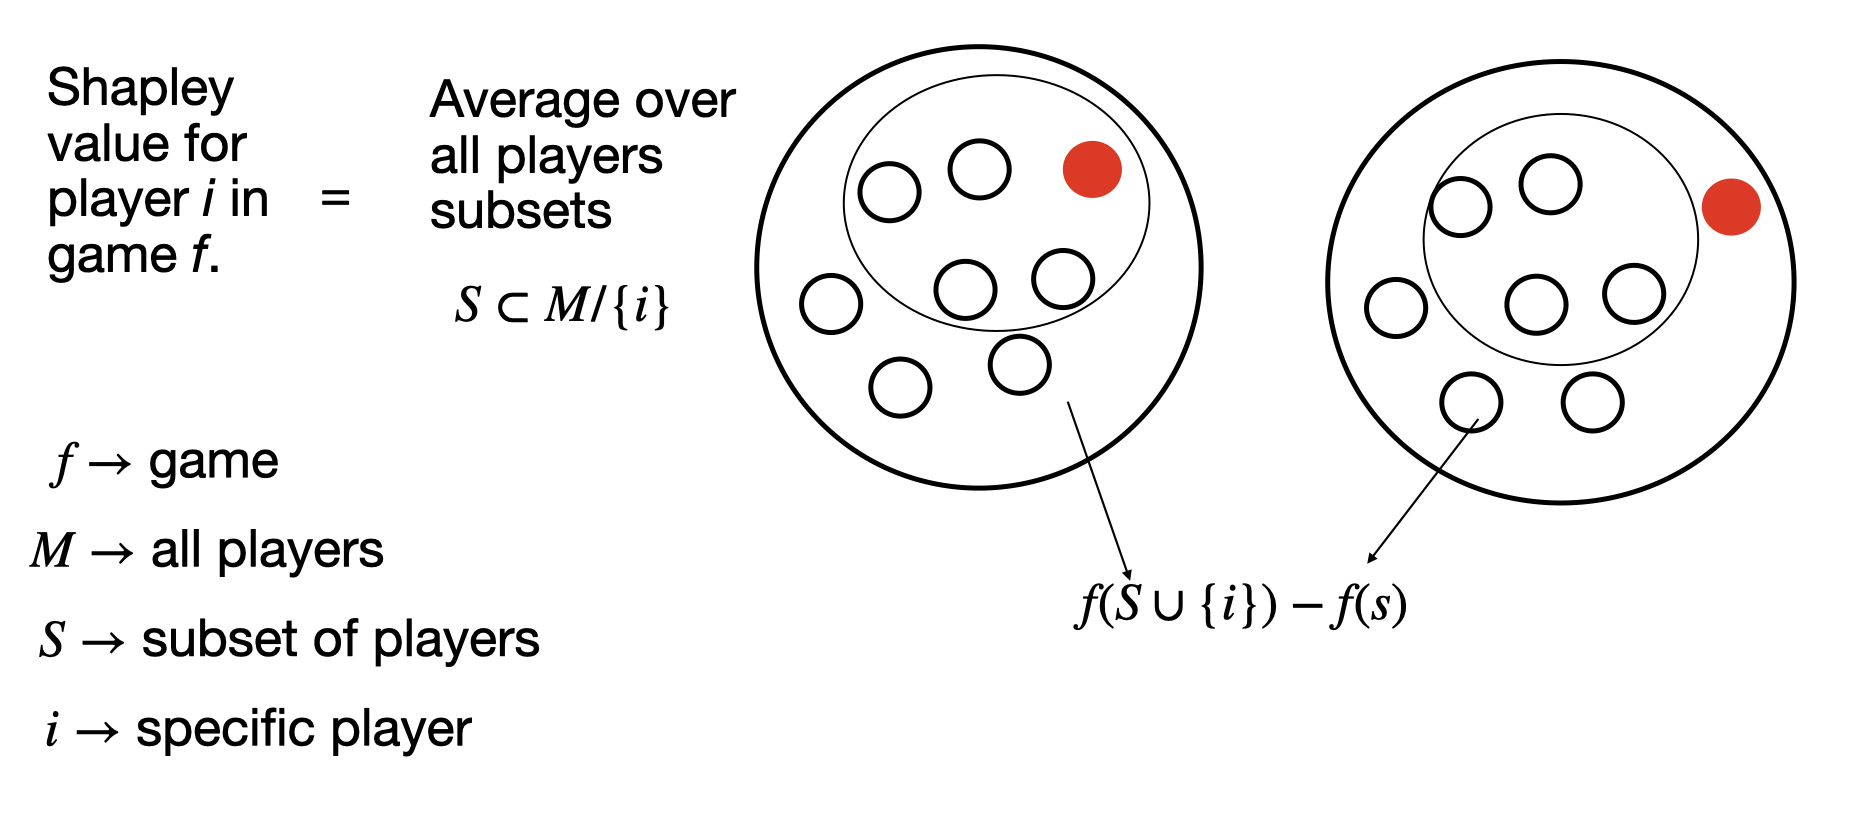

In [1]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
i = Image(filename="/Users/rpezoa/Desktop/shapley_value_diagram.png")
display(i)


In [2]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import root_to_df, filter_region, filter_tag, drop_fakes, drop_twodim
import pandas as pd
import numpy as np

Welcome to JupyROOT 6.16/00


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.17.2 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)
Using TensorFlow backend.
/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/rpezoa/opt/anaconda3/envs/my

In [3]:
data_path = "../processed_data/"
signal = "Xtohh2000_Hw"
region = "SR"
tag=2

In [4]:
df_csv = pd.read_csv(data_path+"Xtohh2000.csv")
df_csv =  filter_region(df_csv,region )
df_csv = filter_tag(df_csv, tag)
df_csv["m_region"].value_counts()
df_csv
y = df_csv["sample"] == signal
display(df_csv.head())
df_csv.columns

,sample,EventWeightNoXSec,EventWeight,EventNumber,m_region,m_FJNbtagJets,m_AntiBTag,m_AntiTauTag,m_FJpt,m_FJeta,...,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,m_hhm_Coll,m_hhm_Eff,m_hhm_ConEff,m_hhm_ConVis
0,Xtohh2000_Hw,0.008301,0.001020,46746,SR,2,3,0,885.55927,0.104927,...,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630,-999.0,1896.5974,1193.0669,1973.7532
4,Xtohh2000_Hw,0.009094,0.001117,47033,SR,2,2,0,855.69904,0.313113,...,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360,-999.0,1832.4620,1597.4098,1934.0298
15,Xtohh2000_Hw,0.007525,0.000925,47483,SR,2,3,0,552.47845,-0.702952,...,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150,-999.0,1759.5939,1056.4438,2125.3684
18,Xtohh2000_Hw,0.009422,0.001158,42700,SR,2,2,0,525.10590,-0.941433,...,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925,-999.0,1262.3474,1561.9706,1574.2820
20,Xtohh2000_Hw,0.009115,0.001120,43588,SR,2,3,0,916.44147,-0.683193,...,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460,-999.0,1807.4701,1296.0286,1838.6957


Index(['sample', 'EventWeightNoXSec', 'EventWeight', 'EventNumber', 'm_region',
       'm_FJNbtagJets', 'm_AntiBTag', 'm_AntiTauTag', 'm_FJpt', 'm_FJeta',
       'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm',
       'm_DTpt_Eff', 'm_DTeta_Eff', 'm_DTphi_Eff', 'm_DTm_Eff',
       'm_DTpt_ConEff', 'm_DTeta_ConEff', 'm_DTphi_ConEff', 'm_DTm_ConEff',
       'm_DTpt_ConVis', 'm_DTeta_ConVis', 'm_DTphi_ConVis', 'm_DTm_ConVis',
       'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt', 'm_hhm_Coll', 'm_hhm_Eff', 'm_hhm_ConEff', 'm_hhm_ConVis'],
      dtype='object')

In [5]:
features=['m_FJpt', 
          'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm','m_dPhiFTwDT', 
          'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm','m_bbttpt']

In [6]:
df = df_csv[features]

In [7]:
df.head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
4,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
15,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
18,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
20,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


In [8]:
import shap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.


##  $X \rightarrow$ data matrix, $Y \rightarrow$ labels vector

In [9]:
X = df.values
Y = y.to_numpy(dtype=int)

## Normalization

In [10]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X)


print(X_scaled[:,0])

[0.44491035 0.42209011 0.19035826 ... 0.36237799 0.03826124 0.26142278]


## Training data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2)
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

(6989, 14)
(6989,)
[1 1 1 ... 1 1 1]


In [12]:
X_train

array([[0.33148224, 0.78691301, 0.06540536, ..., 0.08074622, 0.56821076,
        0.08497897],
       [0.45275337, 0.73078086, 0.61767378, ..., 0.03540867, 0.49760185,
        0.10618682],
       [0.14629816, 0.25701573, 0.20353774, ..., 0.23871821, 0.45143288,
        0.12726382],
       ...,
       [0.52742775, 0.46503426, 0.97949417, ..., 0.31992604, 0.37528748,
        0.33199297],
       [0.28253961, 0.30031475, 0.74380926, ..., 0.26633711, 0.25967575,
        0.20266355],
       [0.44272338, 0.75452825, 0.49471412, ..., 0.2160076 , 0.45494523,
        0.38849085]])

In [13]:

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


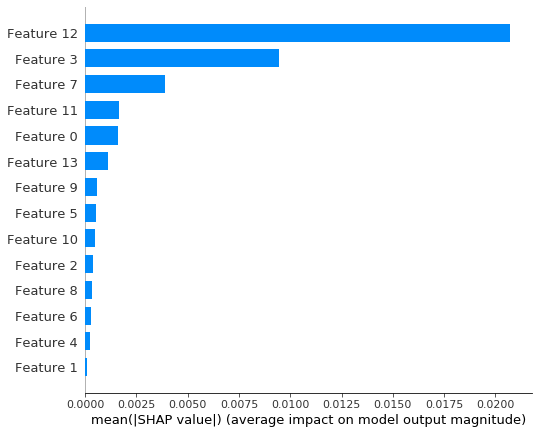

In [14]:

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

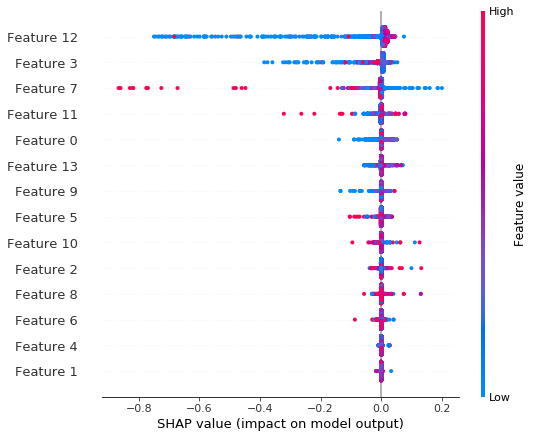

In [15]:
shap.summary_plot(shap_values, X_train)

In [16]:
for i, feat in enumerate(df.columns):
    print(i,":",feat)

0 : m_FJpt
1 : m_FJeta
2 : m_FJphi
3 : m_FJm
4 : m_DTpt
5 : m_DTeta
6 : m_DTphi
7 : m_DTm
8 : m_dPhiFTwDT
9 : m_dRFJwDT
10 : m_dPhiDTwMET
11 : m_MET
12 : m_hhm
13 : m_bbttpt


In [21]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j,model, S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [23]:
shap_plot(2,model,df)

In [24]:
expected_value = shap.TreeExplainer(model).expected_value


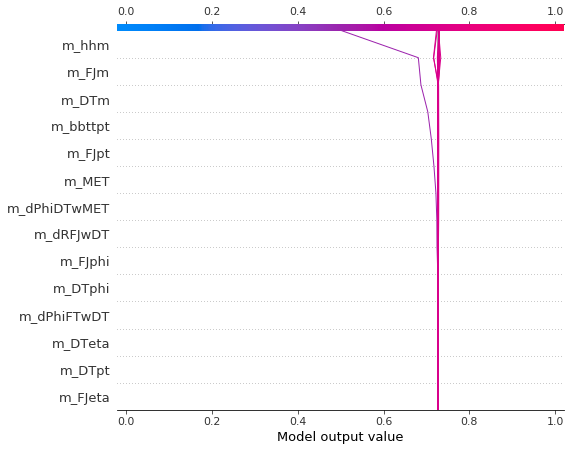

In [32]:
shap.decision_plot(expected_value, shap_values[0:30,:], df.iloc[0:30], link='logit')

In [28]:
shap_values.shape

(6989, 14)